 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns
whale_returns = pd.read_csv("../Starter_Code/Resources/whale_returns.csv", parse_dates=True, infer_datetime_format = True)
whale_returns = whale_returns.set_index(pd.to_datetime(whale_returns['Date'], infer_datetime_format=True))
whale_returns = whale_returns.drop(columns = ['Date'])
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [3]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns = whale_returns.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Reading algorithmic returns
algorithmic_daily_returns = pd.read_csv("../Starter_Code/Resources/algo_returns.csv", parse_dates=True, infer_datetime_format = True)
algorithmic_daily_returns = algorithmic_daily_returns.set_index(pd.to_datetime(algorithmic_daily_returns['Date'], infer_datetime_format=True))
algorithmic_daily_returns = algorithmic_daily_returns.drop(columns = ['Date'])
algorithmic_daily_returns

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [6]:
# Count nulls
algorithmic_daily_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algorithmic_daily_returns = algorithmic_daily_returns.dropna()

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history = pd.read_csv("../Starter_Code/Resources/sp_tsx_history.csv")
sp_tsx_history = sp_tsx_history.set_index(pd.to_datetime(sp_tsx_history['Date'], infer_datetime_format=True))
sp_tsx_history = sp_tsx_history.drop(columns = ['Date'])
sp_tsx_history

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [9]:
# Check Data Types
sp_tsx_history.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp_tsx_history['Close'] = pd.to_numeric(sp_tsx_history['Close'].str.replace('[$|,]+',''))

/var/folders/16/t083_7x94m532lfsy9y_0dfw0000gn/T/ipykernel_3950/4109931866.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  sp_tsx_history['Close'] = pd.to_numeric(sp_tsx_history['Close'].str.replace('[$|,]+',''))


In [11]:
# Calculate Daily Returns
sp_tsx_history['Daily_Returns_tsx'] = sp_tsx_history['Close'].pct_change()

In [12]:
# Drop nulls
sp_tsx_history = sp_tsx_history.dropna()

In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_history = sp_tsx_history.rename(columns = {'Close':'Close_tsx'})

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
whale_algorithmic_tsx = pd.concat([whale_returns, algorithmic_daily_returns, sp_tsx_history], axis = 'columns', join = 'inner')
whale_algorithmic_tsx = whale_algorithmic_tsx.drop(columns = ['Close_tsx'])
whale_algorithmic_tsx

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily_Returns_tsx
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

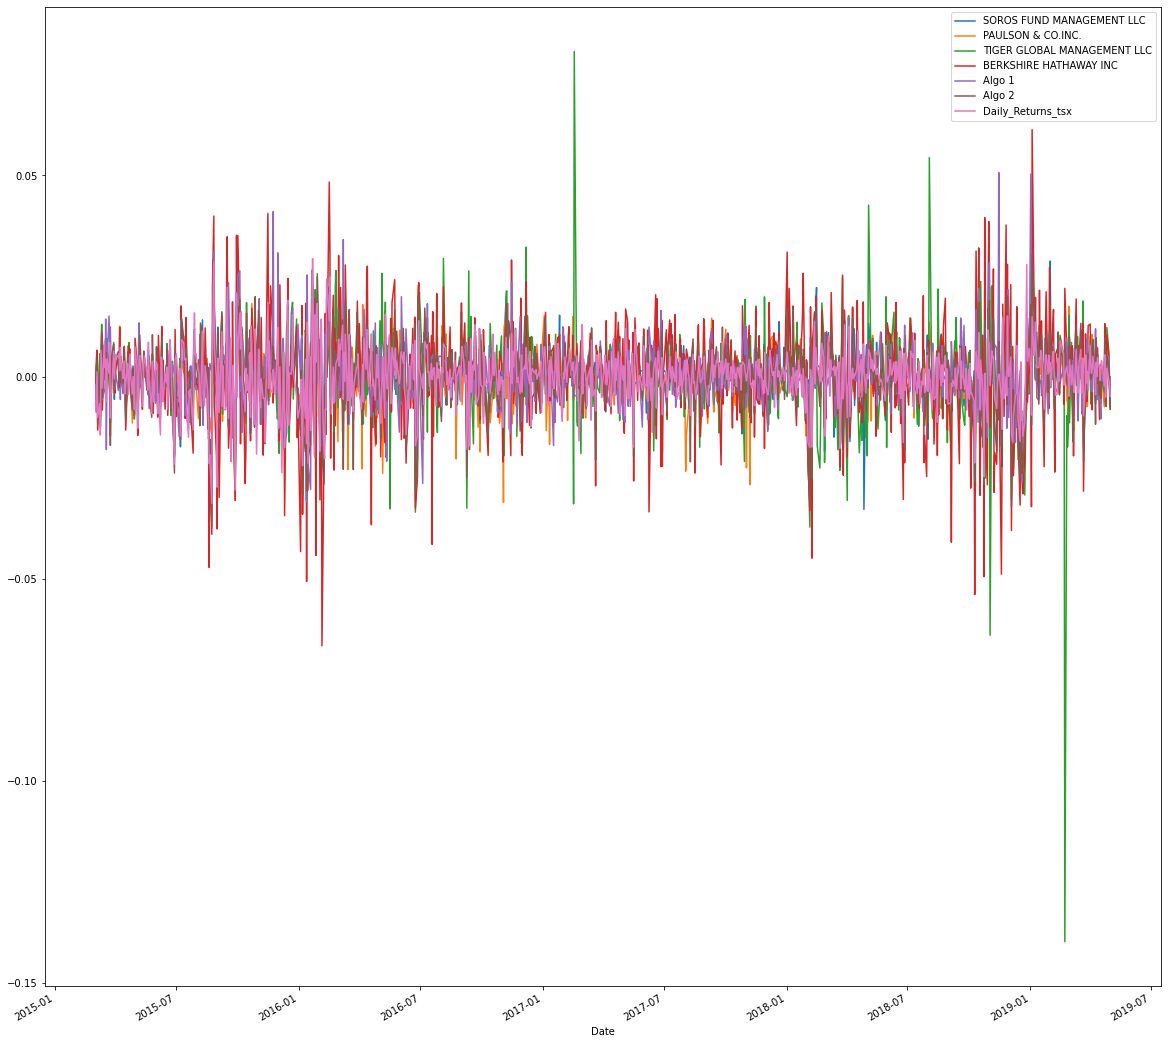

In [15]:
# Plot daily returns of all portfolios
whale_algorithmic_tsx.plot(legend = True, figsize = (20,20));

#### Calculate and Plot cumulative returns.

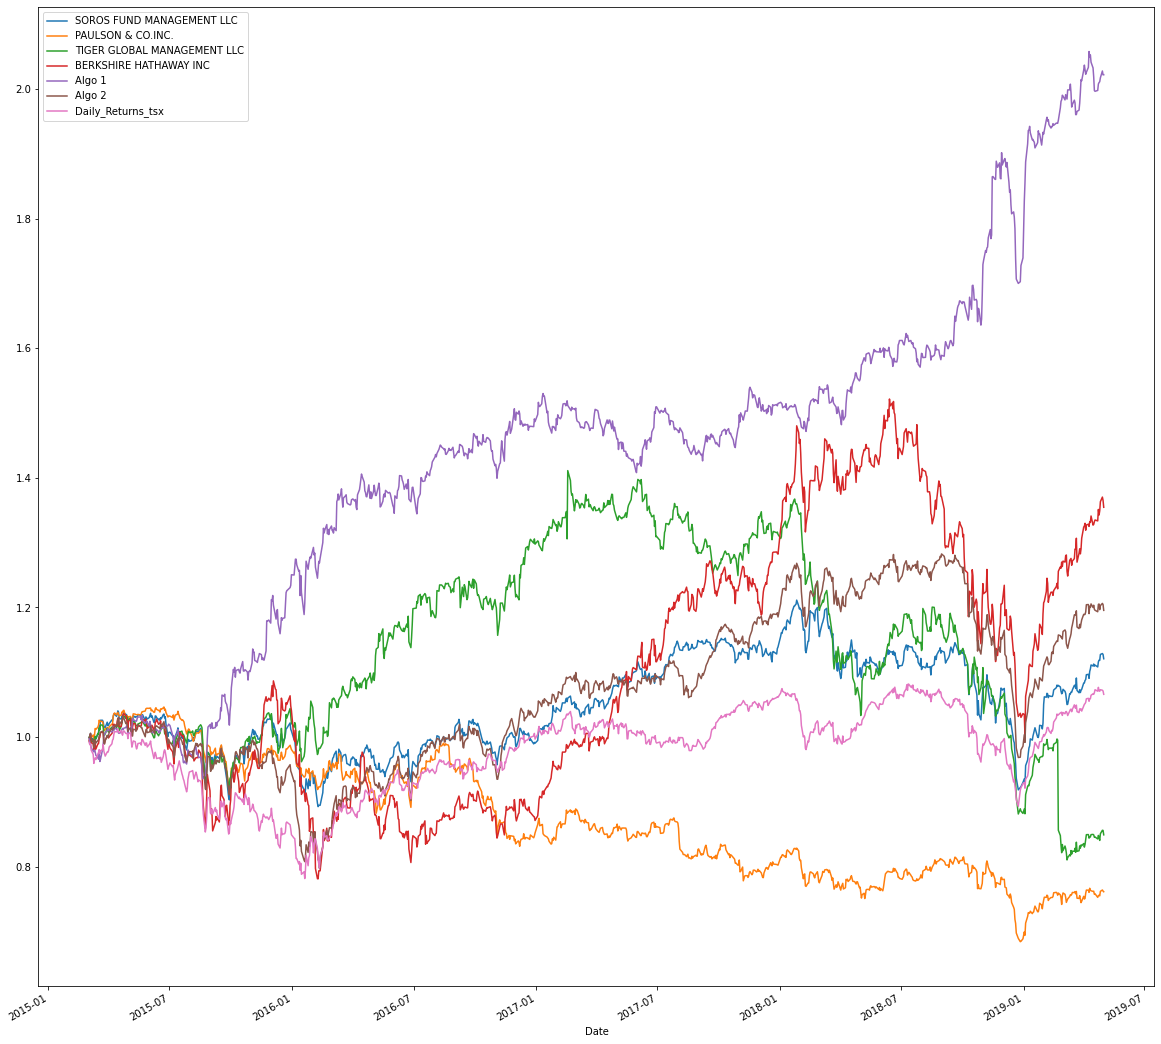

In [16]:
# Calculate cumulative returns of all portfolios
cum_returns = (1 + whale_algorithmic_tsx).cumprod()
# Plot cumulative returns
cum_returns.plot(legend = True, figsize = (20,20));

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


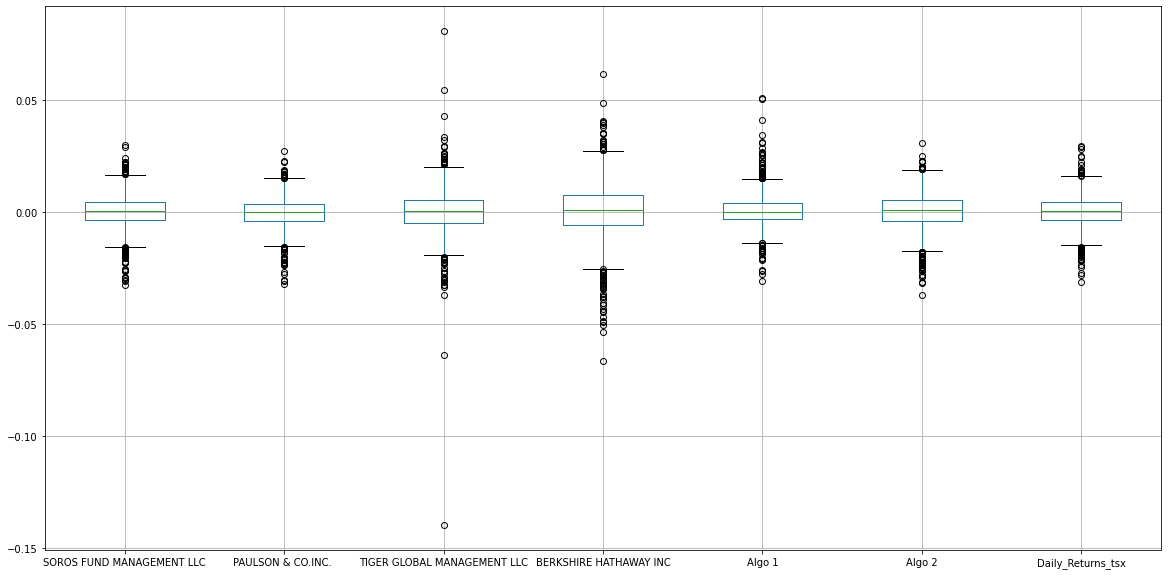

In [17]:
# Box plot to visually show risk
whale_algorithmic_tsx.boxplot(figsize = (20,10));

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
std_dev = whale_algorithmic_tsx.std()

### Determine which portfolios are riskier than the S&P TSX 60

In [19]:
# Calculate  the daily standard deviation of S&P TSX 60

# Determine which portfolios are riskier than the S&P TSX 60
std_dev.sort_values(ascending = False)

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
Daily_Returns_tsx              0.007034
PAULSON & CO.INC.              0.006982
dtype: float64


Berkshire Hathaway,
Tiger Global Management, 
Soros Fund Managament, 
algorithm 1 and algorithm 2 are more risky than tsx index


### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
annualised_std_dev = std_dev * np.sqrt(252)
annualised_std_dev

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
Daily_Returns_tsx              0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

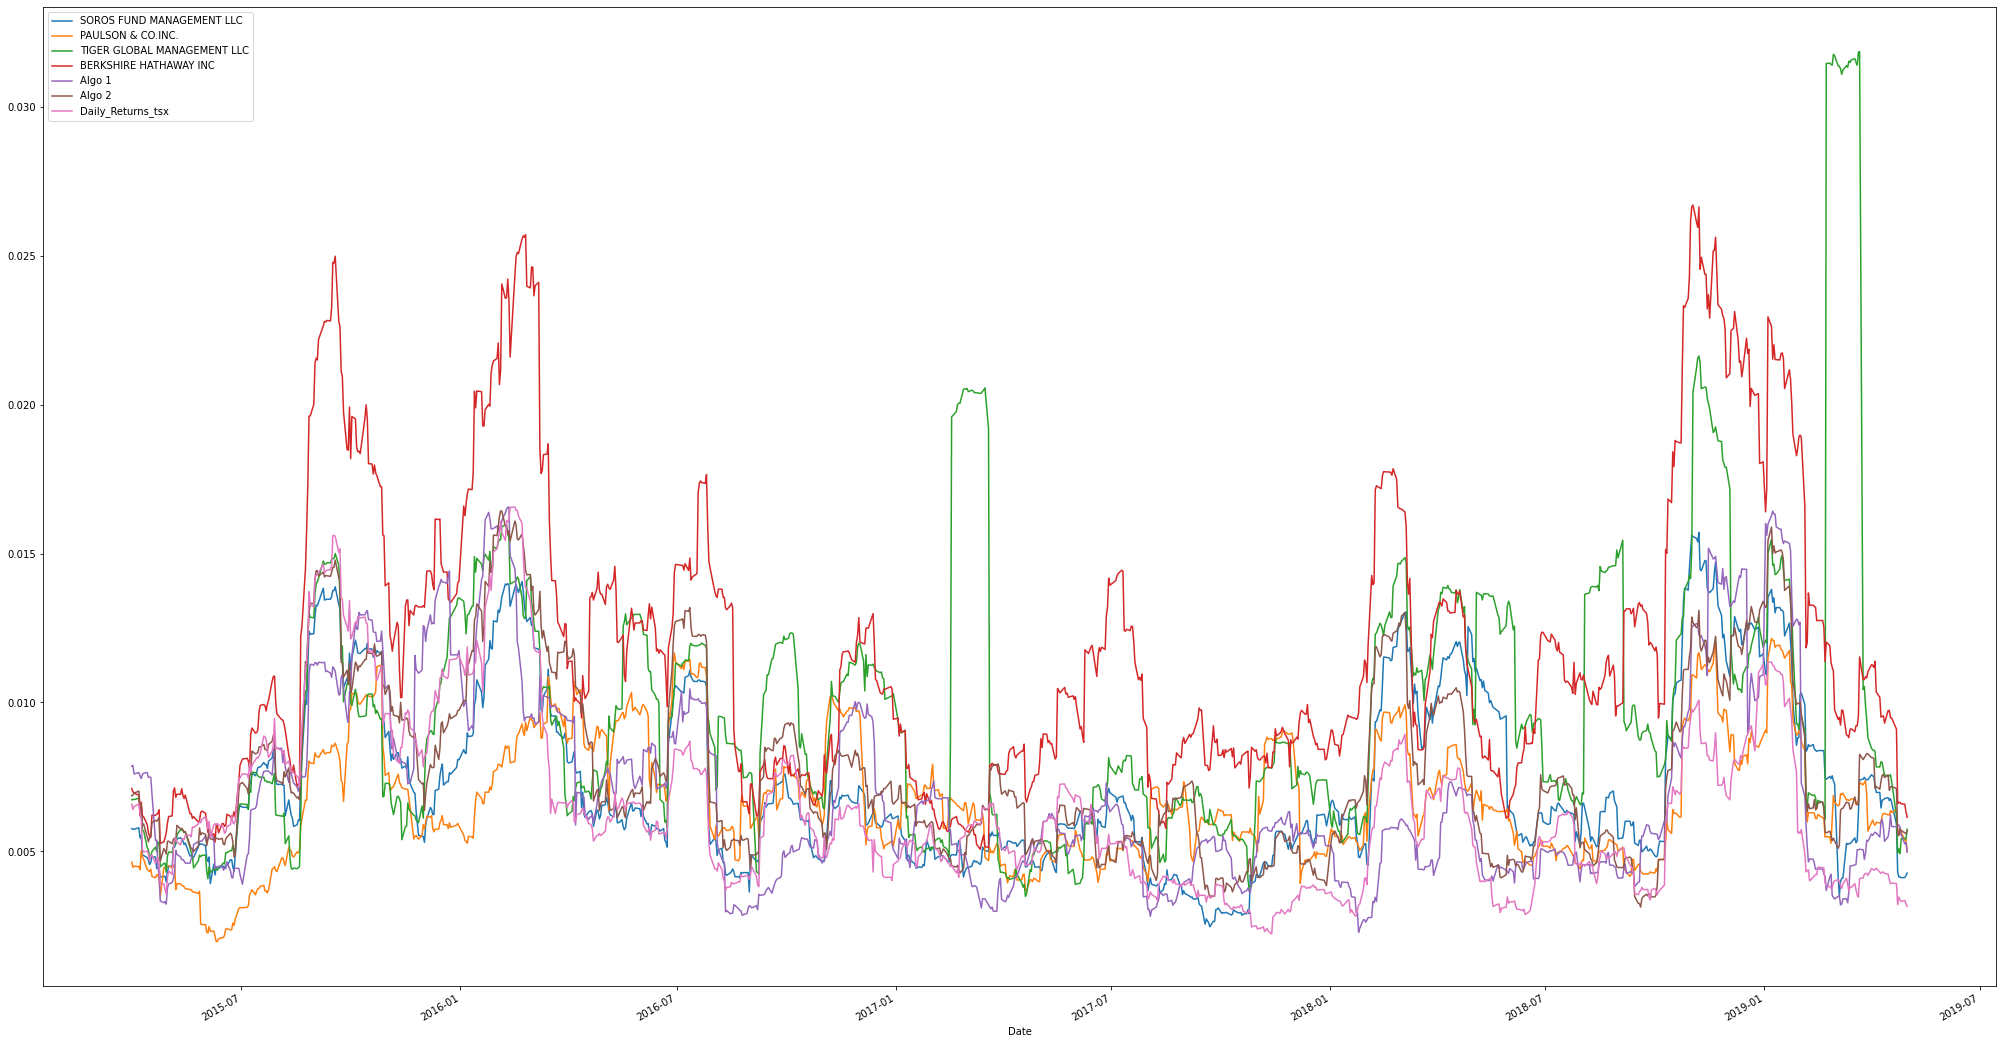

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_dev = whale_algorithmic_tsx.rolling(21).std()
# Plot the rolling standard deviation
rolling_std_dev.plot.line(legend = True, figsize = (35,20));

### Calculate and plot the correlation

In [24]:
# Calculate the correlation
correlation = whale_algorithmic_tsx.corr()
# Display de correlation matrix
display(correlation)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily_Returns_tsx
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
Daily_Returns_tsx,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

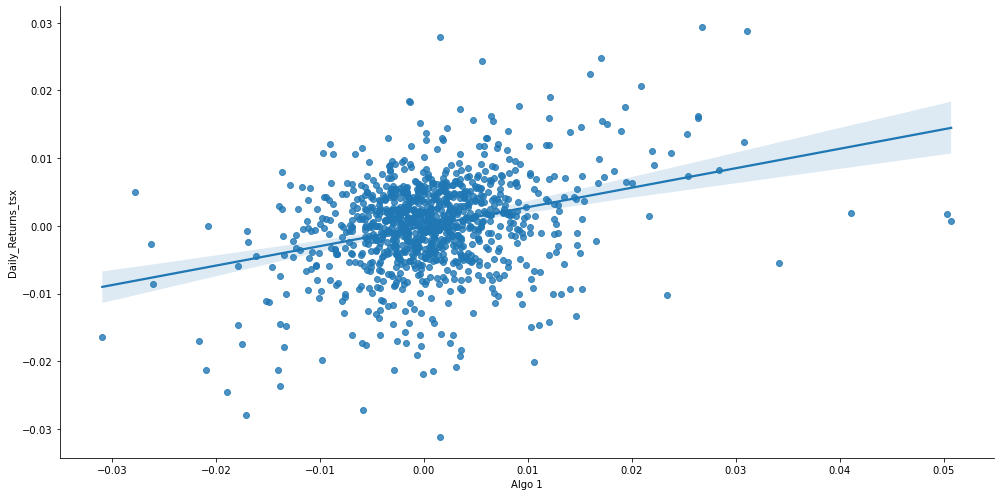

In [25]:
# Calculate covariance of a single portfolio
covariance_algo1_tsx = correlation.loc['Algo 1', 'Daily_Returns_tsx'] * (std_dev['Algo 1'] * std_dev['Daily_Returns_tsx'])

# Calculate variance of S&P TSX
variance_tsx = std_dev['Daily_Returns_tsx']**2

# Computing beta
algo1_beta = covariance_algo1_tsx/variance_tsx

# Plot beta trend
import seaborn as sns
sns.lmplot(data = whale_algorithmic_tsx, x = 'Algo 1', y = 'Daily_Returns_tsx', fit_reg=True, height = 7, aspect = 2);

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [26]:
# Use `ewm` to calculate the rolling window
ewm_whale_algorithmic_tsx = whale_algorithmic_tsx.ewm(halflife = 21).mean()
ewm_whale_algorithmic_tsx

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily_Returns_tsx
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761,-0.005908
2015-03-05,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988,-0.003410
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542,-0.005133
2015-03-09,-0.000511,0.000673,-0.000616,-0.002128,-0.004400,-0.000935,-0.005436
...,...,...,...,...,...,...,...
2019-04-25,0.001277,0.000032,-0.001058,0.001860,0.000625,0.000876,0.001018
2019-04-26,0.001500,0.000329,-0.000622,0.002138,0.000702,0.001018,0.001058
2019-04-29,0.001492,0.000406,-0.000399,0.002238,0.000848,0.001077,0.000998


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [27]:
# Annualized Sharpe Ratios
sharpe_ratio = (whale_algorithmic_tsx.mean() * 252)/(std_dev * np.sqrt(252))

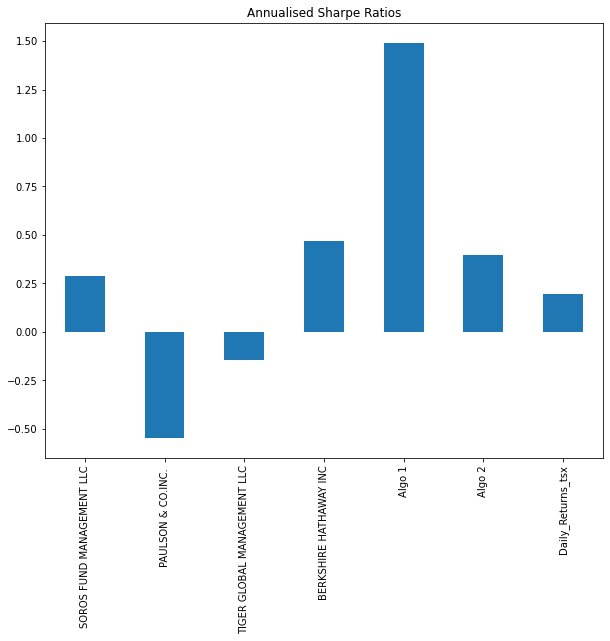

In [28]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar(figsize = (10,8), title = 'Annualised Sharpe Ratios');

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Algo 1 far outperforms all other portfolios in terms of reward to risk. Algo 2 exceeds performance all other whale portfolios and S&P TSX 60 portfolio, except for Berkshire Hathaway

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [60]:
# Reading data from 1st stock
l_df = pd.read_csv("../Starter_Code/Resources/l_historical.csv", index_col = 'Date', parse_dates=True, infer_datetime_format = True)
l_df = l_df.rename(columns = {'Close':'l_close'})

In [61]:
# Reading data from 2nd stock
otex_df = pd.read_csv("../Starter_Code/Resources/otex_historical.csv", index_col = 'Date', parse_dates=True, infer_datetime_format = True)
otex_df = otex_df.rename(columns = {'Close':'otex_close'})

In [62]:
# Reading data from 3rd stock
shop_df = pd.read_csv("../Starter_Code/Resources/shop_historical.csv", index_col = 'Date', parse_dates=True, infer_datetime_format = True)
shop_df = shop_df.rename(columns = {'Close':'shop_close'})

In [63]:
# Combine all stocks in a single DataFrame
stock_combined = pd.concat([l_df, otex_df, shop_df], axis = 'columns', join = 'inner')
stock_combined

,Symbol,l_close,Symbol,otex_close,Symbol,shop_close
Date,,,,,,
2018-01-02,L,57.99,OTEX,43.58,SHOP,132.06
2018-01-03,L,57.41,OTEX,43.07,SHOP,135.15
2018-01-04,L,57.42,OTEX,42.91,SHOP,137.46
2018-01-05,L,57.42,OTEX,42.57,SHOP,137.26
2018-01-08,L,56.86,OTEX,42.16,SHOP,139.51
...,...,...,...,...,...,...
2019-12-20,L,67.90,OTEX,58.68,SHOP,513.22
2019-12-23,L,67.68,OTEX,57.89,SHOP,511.62
2019-12-24,L,67.67,OTEX,57.44,SHOP,525.39


In [64]:
# Reset Date index


In [65]:
# Reorganize portfolio data by having a column per symbol
stock_combined = stock_combined.drop(columns = ['Symbol'])
stock_combined

,l_close,otex_close,shop_close
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51
...,...,...,...
2019-12-20,67.90,58.68,513.22
2019-12-23,67.68,57.89,511.62
2019-12-24,67.67,57.44,525.39


In [68]:
# Calculate daily returns
returns = stock_combined.pct_change()
# Drop NAs
returns = returns.dropna()
# Display sample data
returns

,l_close,otex_close,shop_close
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254
...,...,...,...
2019-12-20,0.003547,0.024441,-0.005503
2019-12-23,-0.003240,-0.013463,-0.003118
2019-12-24,-0.000148,-0.007773,0.026915


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [76]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_return = returns.dot(weights)
# Display sample data
portfolio_return.name = 'my_portfolio'
display(portfolio_return)

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
                ...   
2019-12-20    0.007495
2019-12-23   -0.006607
2019-12-24    0.006331
2019-12-27    0.007995
2019-12-30   -0.015737
Name: my_portfolio, Length: 500, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [78]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolios = pd.concat([whale_algorithmic_tsx, portfolio_return], axis = 'columns', join = 'inner')
all_portfolios

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily_Returns_tsx,my_portfolio
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.003461
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.003243
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.003303


In [79]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolios = all_portfolios.dropna()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [80]:
# Calculate the annualized `std`
annual_deviations = all_portfolios.std() * np.sqrt(252)
annual_deviations

SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
Daily_Returns_tsx              0.099121
my_portfolio                   0.224346
dtype: float64

### Calculate and plot rolling `std` with 21-day window

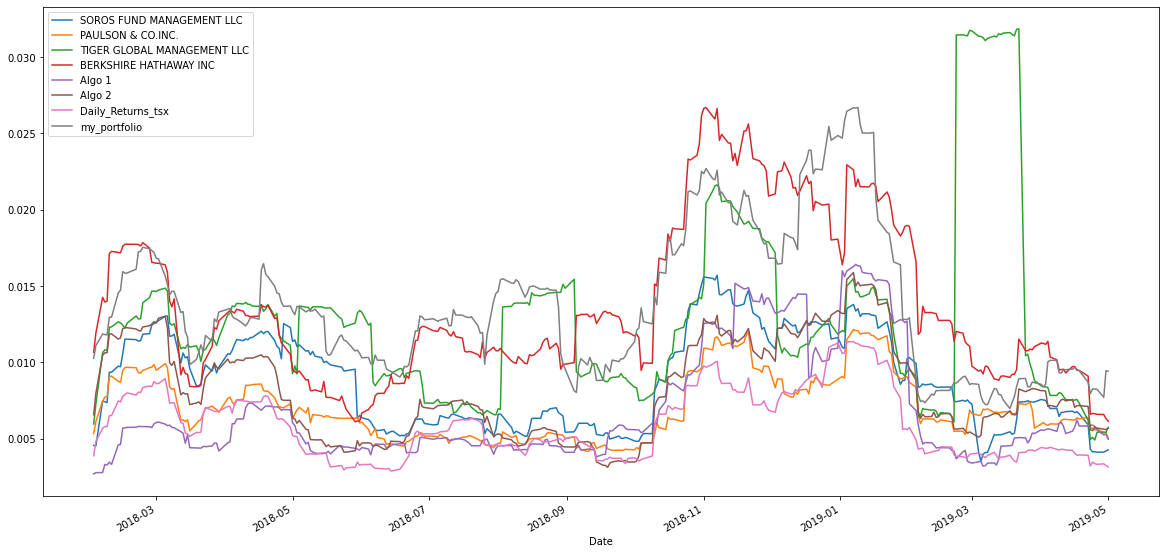

In [84]:
# Calculate rolling standard deviation
rolling_deviations_21 = all_portfolios.rolling(window = 21).std()
# Plot rolling standard deviation
rolling_deviations_21.plot.line(figsize = (20, 10));

### Calculate and plot the correlation

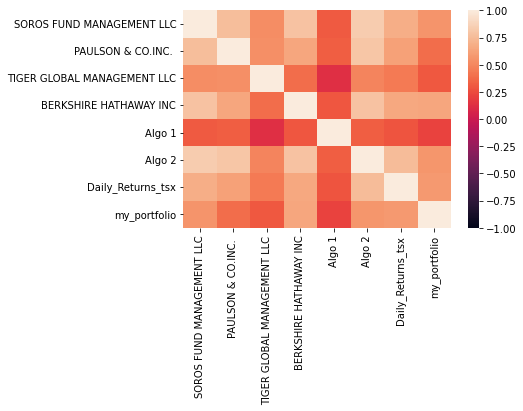

In [85]:
# Calculate and plot the correlation
import seaborn as sns
corr_all_portfolios = all_portfolios.corr()
sns.heatmap(data=corr_all_portfolios, vmin = -1, vmax = 1);

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

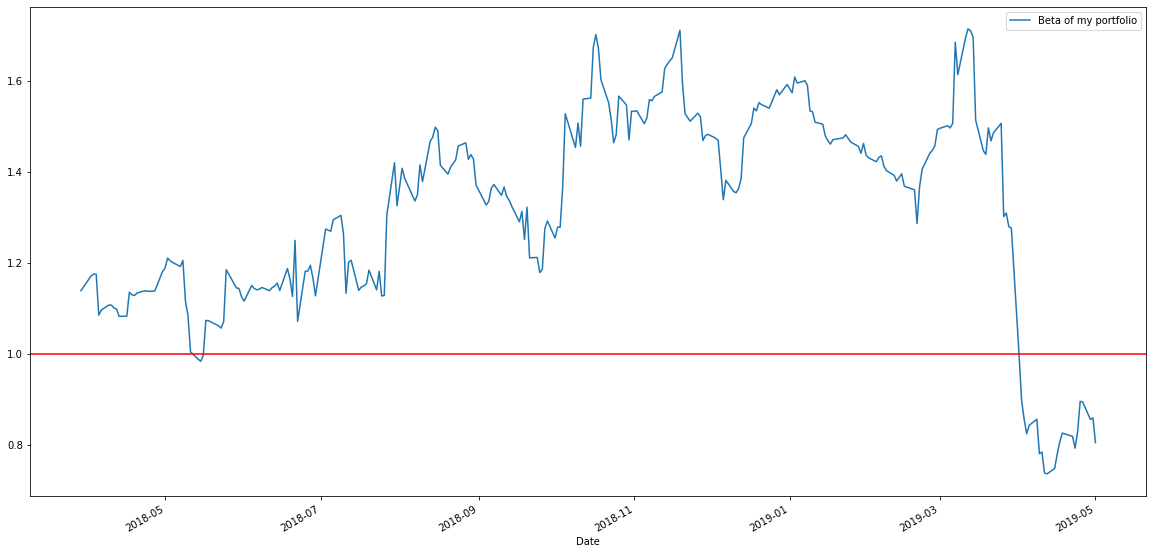

In [136]:
# Calculate and plot Beta
covariance_60 = all_portfolios.rolling(window = 60).cov()
variance_60 = all_portfolios.rolling(window = 60).var()

covariance_60 = covariance_60.reset_index()
covariance_60_my = covariance_60[covariance_60['level_1']=='my_portfolio']
covariance_60_my = covariance_60_my.drop(columns = ['level_1']).set_index('Date')
covariance_60_my = covariance_60_my[['Daily_Returns_tsx']]

variance_60_tsx = variance_60[['Daily_Returns_tsx']]

beta_60_my = covariance_60_my/variance_60_tsx
ax = beta_60_my.plot.line(figsize = (20, 10))
ax.axhline(y = 1, color = 'red')
ax.legend(['Beta of my portfolio'])


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [138]:
# Calculate Annualized Sharpe Ratios
all_portfolios_sharpe = (all_portfolios.mean() * 252)/(all_portfolios.std() * np.sqrt(252))
all_portfolios_sharpe

SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
Daily_Returns_tsx              0.034651
my_portfolio                   1.564547
dtype: float64

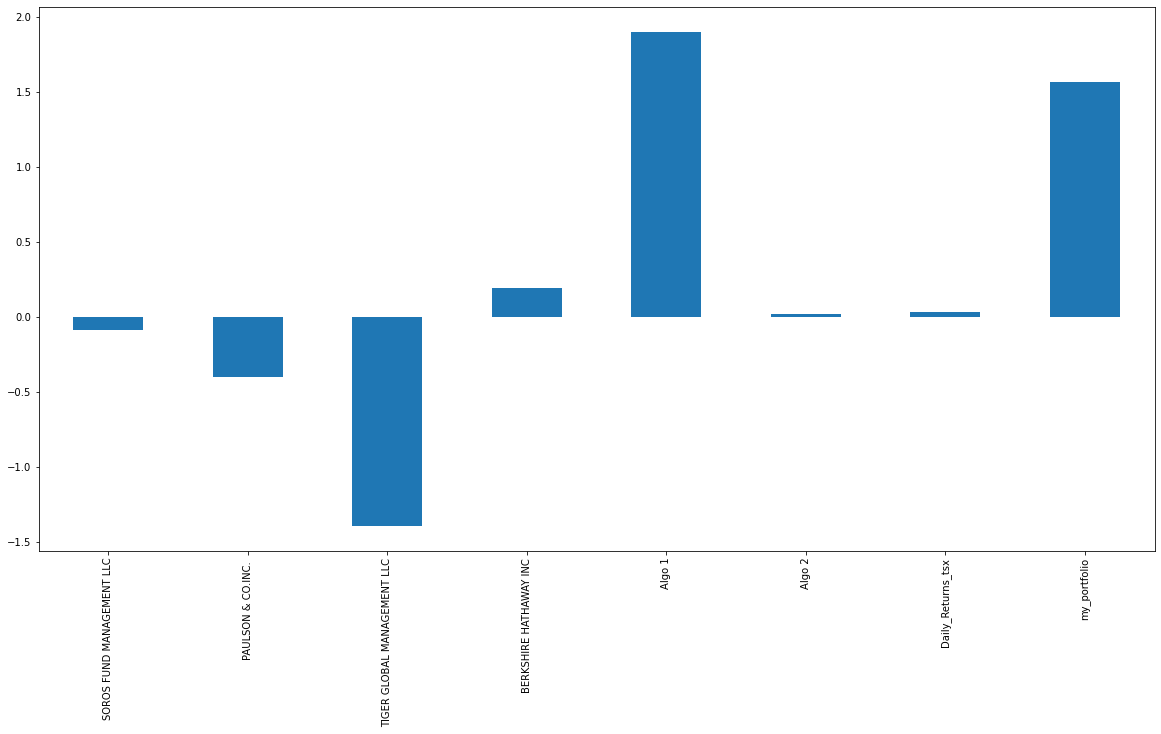

In [140]:
# Visualize the sharpe ratios as a bar plot
all_portfolios_sharpe.plot.bar(figsize = (20, 10));

### How does your portfolio do?

Quite well! Almost on par with Algo 1 far exceeding the reward to risk ratios of all other portfolios including S&P 60 tsx